In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap

df_ads_mapdata = pd.read_pickle('df_ads_mapdata.pkl')


Plotting the average price of a property by property type and the number of bedrooms. This is based on daft.ie data.

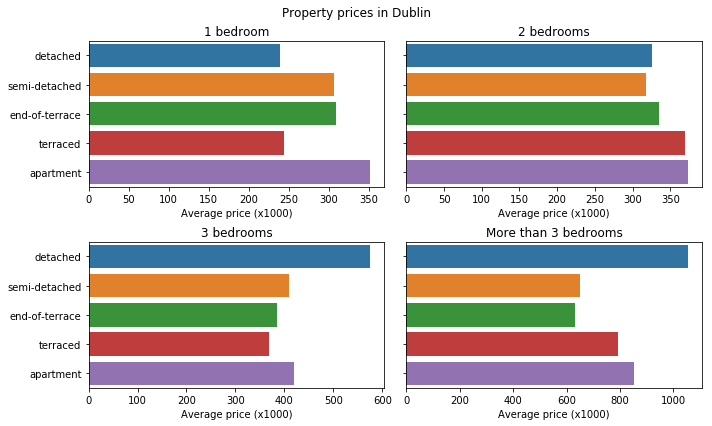

In [6]:
props = df_ads_mapdata.property_type.value_counts()[0:5].index
df = df_ads_mapdata[df_ads_mapdata["property_type"].isin(props)].copy()
df["price"] = df["price"] / 1000

bedroom_labels = ["1 bedroom","2 bedrooms","3 bedrooms","More than 3 bedrooms"]
bedrooms = pd.cut(df.beds,[0,1,2,3,99],labels=bedroom_labels)
bedrooms = bedrooms.to_frame()
bedrooms.columns = ['bedrooms']
df = pd.concat([df,bedrooms],axis = 1)

fig, axes = plt.subplots(2,2,sharey=True,figsize=(10,6))
for ax, label in zip(axes.flatten(), bedroom_labels):
    sns.barplot(x='price',y='property_type', data=df[df["bedrooms"]==label], estimator=np.mean, ci=None, ax=ax)
    ax.set(title=label, xlabel="Average price (x1000)", ylabel=None)

fig.suptitle('Property prices in Dublin')
fig.tight_layout()
fig.subplots_adjust(top=0.9)

plt.show()
fig.savefig("images/prices_property_type.png", dpi=300)


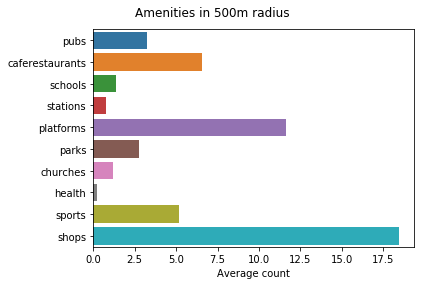

In [7]:
osm_vars = ['pubs', 'caferestaurants', 'schools', 'stations', 'platforms', 'parks', 'churches', 'health', 'sports', 'shops']

df = pd.melt(df_ads_mapdata[osm_vars],value_vars=osm_vars)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
sns.barplot(x='value',y='variable', data=df, estimator=np.mean, ci=None)
plt.suptitle('Amenities in 500m radius')
plt.xlabel("Average count")
plt.ylabel(None)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

fig.savefig("images/amenities.png", dpi=300)


In [8]:
hmap = folium.Map(location=[53.346300, -6.263100], zoom_start=12, )

df = df_ads_mapdata[["latitude","longitude","price","surface"]].dropna()

df = df[df.surface>5]
df = df[df.surface<400]

df["price_sqm"] = df.price / df.surface

hm_price_sqm = HeatMap( list(zip(df.latitude, df.longitude, df.price_sqm)),
                   min_opacity=0.2,
                   max_val=70000,
                   radius=20, blur=10, 
                   max_zoom=1, 
                 )

hmap.add_child(hm_price_sqm)

hmap.save('images/heatmap_price_sqm.html')


In [9]:
hmap = folium.Map(location=[53.346300, -6.263100], zoom_start=12, )

df = df_ads_mapdata[["latitude","longitude","price"]].dropna()

hm_price = HeatMap( list(zip(df.latitude, df.longitude, df.price)),
                   min_opacity=0.2,
                   max_val=10000000,
                   radius=20, blur=10, 
                   max_zoom=5, 
                 )

hmap.add_child(hm_price)

hmap.save('images/heatmap_price.html')